<a href="https://colab.research.google.com/github/evillarreal11/Project_4/blob/main/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hvplot
!pip install selenium

In [ ]:
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from google.colab import files

In [ ]:
import os

spark_version = 'spark-3.4.2'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,847 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,350 kB]
Fetched 3,426 kB in 2s (1,674 kB/s)
Reading package lists... Done


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Project 4").getOrCreate()

In [ ]:
import pandas as pd
from google.colab import drive

# Connect Colab to Google Drive and access dataset
drive.mount('/content/drive',force_remount=True)

path = "/content/drive/MyDrive/Project4/creditcard.csv"

creditcard_df = pd.read_csv(path, header=0, low_memory=False, sep=',')

Mounted at /content/drive


In [ ]:
# Show first rows of the dataframe
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Drop duplicate rows from the dataframe
new_cc_df = creditcard_df.drop_duplicates()
new_cc_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# Drop rows with NAs from the dataframe
new_cc_df = new_cc_df.dropna()
new_cc_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# Group by class (fraud or normal), and find the average of transaction amount
class_grouped = new_cc_df[['Amount','Class']].groupby('Class').mean()
class_grouped

,Amount
Class,
0,88.413575
1,123.871860


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

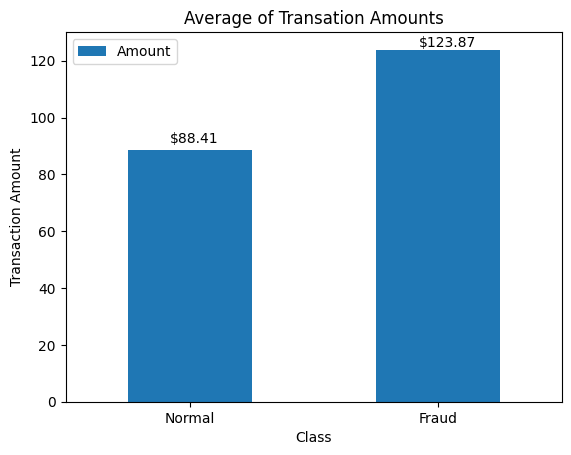

In [ ]:
# Create plot showing the average transaction amount by class
from matplotlib import pyplot as plt
Avg_Amounts_barplot = class_grouped.plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Transaction Amount")
plt.xticks([0, 1], ["Normal", "Fraud"], rotation="horizontal")
plt.title("Average of Transation Amounts")
plt.text(-.08,91, '$88.41')
plt.text(.925,125, '$123.87')

plt.savefig("Avg_Amnts_barplot.png")
files.download("Avg_Amnts_barplot.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

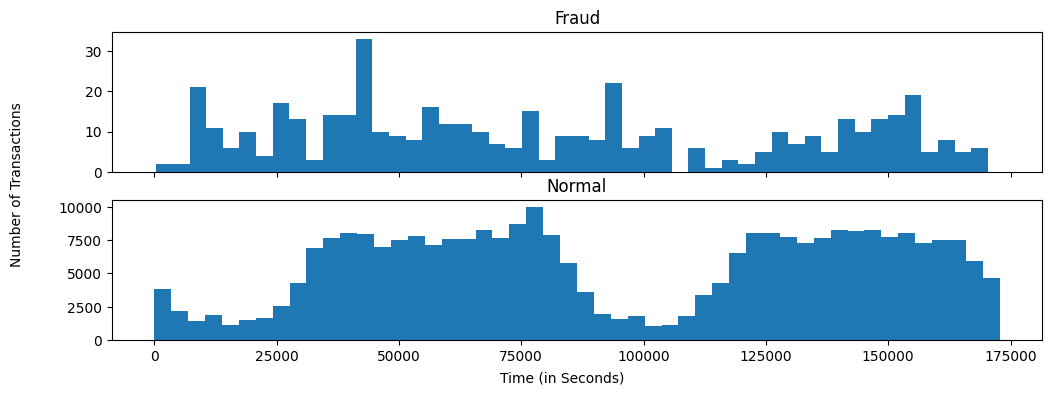

In [ ]:
# Create side-by-side plots showing different time delays between normal and fraudulent transactions
f, (ax1, ax2) = plt.subplots(2,1,sharex=True, figsize=(12,4))

ax1.hist(new_cc_df.Time[new_cc_df.Class==1], bins= 50)
ax1.set_title('Fraud')

ax2.hist(new_cc_df.Time[new_cc_df.Class==0], bins= 50)
ax2.set_title('Normal')

f.text(0.5, 0.005, 'Time (in Seconds)', ha='center')
f.text(0.04, 0.5, 'Number of Transactions', va='center', rotation='vertical')

plt.savefig("Fraud_Normal_hist.png")
files.download("Fraud_Normal_hist.png")
plt.show()

In [ ]:
import holoviews as hv
import panel as pn
pn.extension()

In [ ]:
if 'google.colab' in str(get_ipython()):
    def _render(self, **kw):
        hv.extension('bokeh')
        return hv.Store.render(self)
    hv.core.Dimensioned._repr_mimebundle_ = _render

In [ ]:
# Create scatterplot showing the transaction amount by time for each transaction, and use color to demonstrate fraudulent vs. normal transactions
scatter = new_cc_df.hvplot.scatter(x='Time', y='Amount', by='Class', ylim=(0, 15000))
hv.save(scatter, 'Transaction_Scatter.html')
files.download("Transaction_Scatter.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

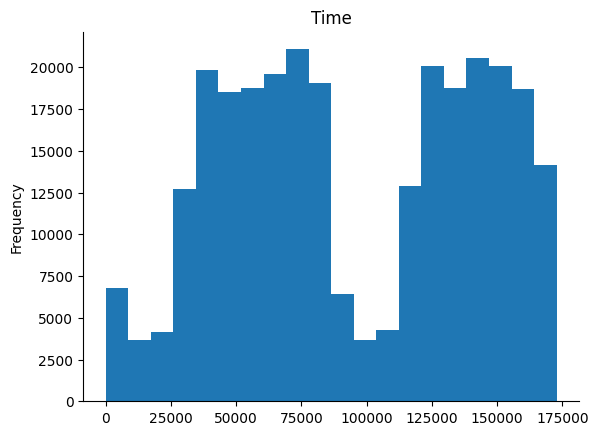

In [ ]:
# Create plot showing the number of transactions taking place at certain times
from matplotlib import pyplot as plt
new_cc_df['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig("Time_Hist.png")
files.download("Time_Hist.png")
plt.show()

In [ ]:
# convert pandas dataframe to a spark dataframe, show first rows
spark_df = spark.createDataFrame(new_cc_df)
spark_df.show()

+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------+-----+
|Time|                V1|                 V2|                V3|                 V4|                 V5|                 V6|                 V7|                 V8|                V9|                V10|               V11|               V12|                V13|                V14|                V15|                V16|                V17|                V18|                V19|                V20|                V21|     

In [ ]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = new_cc_df['Class']

# Separate the X variable, the features
X = new_cc_df.drop(columns=['Class'])

In [ ]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
# Review the X variable DataFrame
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
# Check the balance of our target values
y.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [ ]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using training data
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [ ]:
# Make a prediction using the testing data
testing_predictions = classifier.predict(X_test)

In [ ]:
# Print the balanced_accuracy score of the model
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_test, testing_predictions)}')

Balanced Accuracy Score: 0.7861941974887106


In [ ]:
# Generate a confusion matrix for the model
test_matrix = confusion_matrix(y_test, testing_predictions)
print(test_matrix)

[[70798    24]
 [   47    63]]


In [ ]:
# Print the classification report for the model
testing_report = classification_report(y_test, testing_predictions)
print(testing_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70822
           1       0.72      0.57      0.64       110

    accuracy                           1.00     70932
   macro avg       0.86      0.79      0.82     70932
weighted avg       1.00      1.00      1.00     70932



In [ ]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ro_model = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_res, y_res = ro_model.fit_resample(X_train, y_train)

In [ ]:
# Count the distinct values of the resampled labels data, show updated balance
y_res.value_counts()

0    212431
1    212431
Name: Class, dtype: int64

In [ ]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
res_classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using the resampled training data
res_classifier.fit(X_res, y_res)

# Make a prediction using the testing data
res_predictions = res_classifier.predict(X_res)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Print the balanced_accuracy score of the model
print(f'Balanced Accuracy Score: {round(balanced_accuracy_score(y_res, res_predictions),2)}')

Balanced Accuracy Score: 0.94


In [ ]:
# Generate a confusion matrix for the model
res_matrix = confusion_matrix(y_res, res_predictions)
print(res_matrix)

[[205105   7326]
 [ 16874 195557]]


In [ ]:
# Print the classification report for the model
res_report = classification_report(y_res, res_predictions)
print(res_report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94    212431
           1       0.96      0.92      0.94    212431

    accuracy                           0.94    424862
   macro avg       0.94      0.94      0.94    424862
weighted avg       0.94      0.94      0.94    424862



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

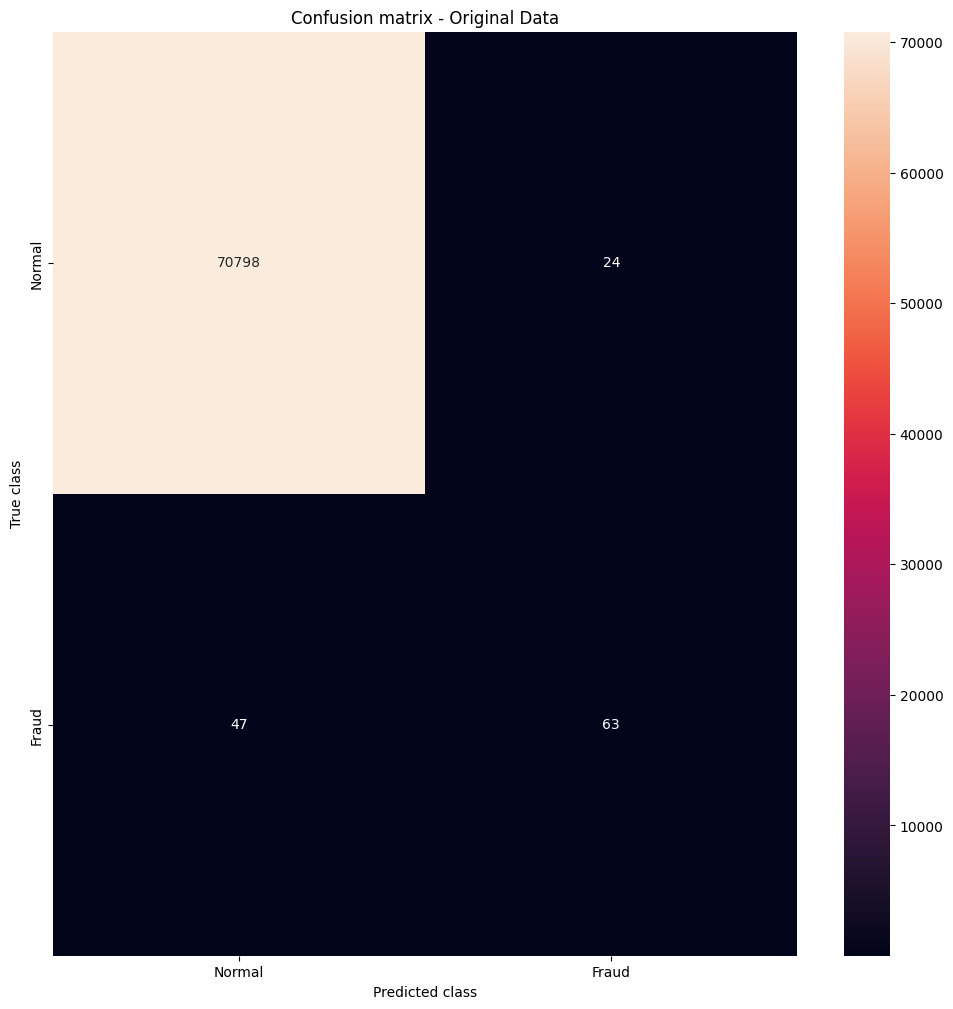

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, testing_predictions)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt ="d");
plt.title("Confusion matrix - Original Data")
plt.ylabel('True class')
plt.xlabel('Predicted class')

plt.savefig("Orig_Confusion_Matrix.png")
files.download("Orig_Confusion_Matrix.png")

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

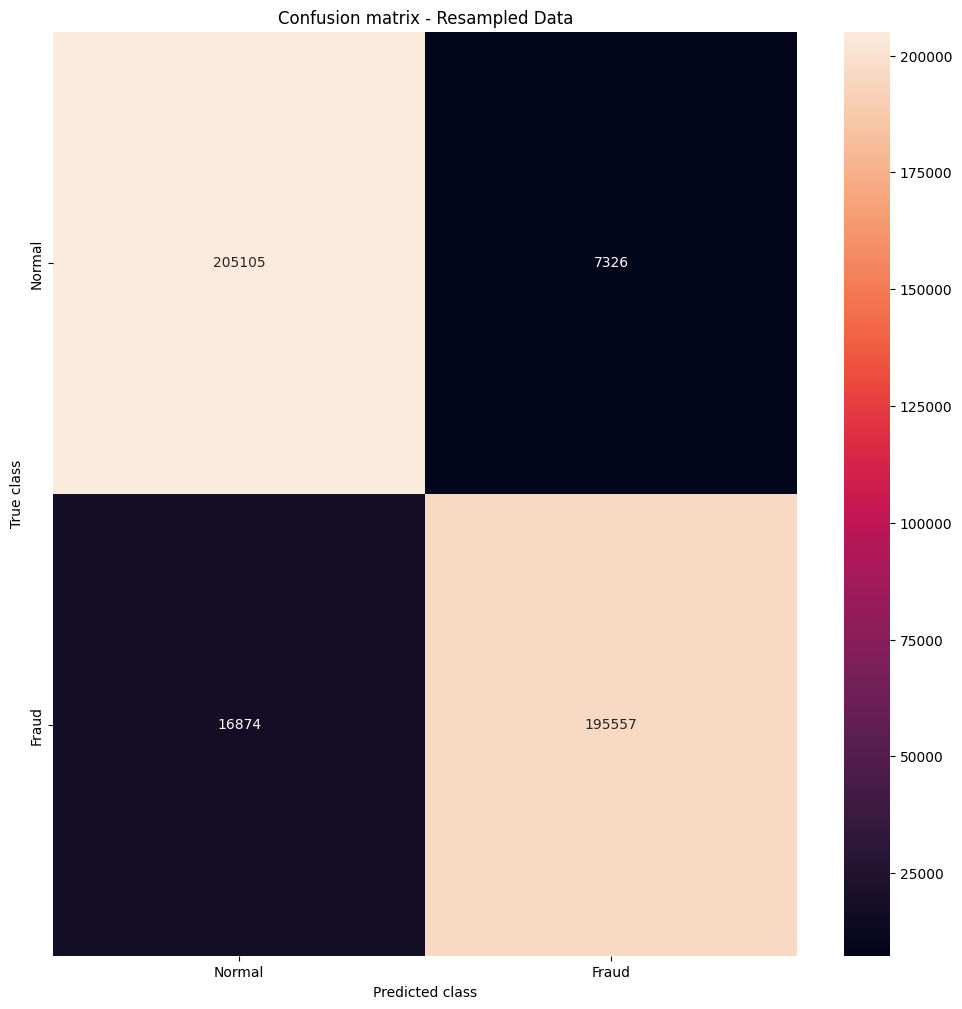

In [ ]:
labels = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_res, res_predictions)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt ="d");
plt.title("Confusion matrix - Resampled Data")
plt.ylabel('True class')
plt.xlabel('Predicted class')

plt.savefig("Res_Confusion_Matrix.png")
files.download("Res_Confusion_Matrix.png")

plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
import joblib as jlib

In [ ]:
#!mkdir "/content/drive/My Drive/Trained Models"

In [ ]:
os.path.exists("/content/drive/My Drive/Trained Models")

True

In [ ]:
saved_model_path = '/content/drive/My Drive/Trained Models/'
jlib.dump(res_classifier, '/content/drive/My Drive/Trained Models/mymodel.pkl')
# jlib.dump(<model_name>, '/content/drive/My Drive/Trained Models/scale1.pkl').  # may be  standard sclale this is the output of the scaler.fit() ; don't dump this scaler = StandardScaler()
# jlib.dump(<model_name>, '/content/drive/My Drive/Trained Models/scale2.pkl'). # may be  standard sclale this is the output of the scaler.fit() ; don't dump this scaler = MixMaxScaler()

['/content/drive/My Drive/Trained Models/mymodel.pkl']

In [ ]:
# import joblib as jlib
# myModel = jlib.load("/content/drive/My Drive/Trained Models/mymodel.pkl")

In [ ]:
def make_pred(X_input):
  # perform same scaling / onehot encode as when you trained the model
  feature_cols = ['Time', 'V1',	'V2',	'V3',	'V4',	'V5', 'V6',	'V7',	'V8',	'V9',	'V10',	'V11', 'V12',	'V13',	'V14',	'V15', 'V16',	'V17',	'V18',	'V19', 'V20', 'V21',	'V22',	'V23',	'V24',	'V25',	'V26',	'V27',	'V28', 'Amount']
  X_raw_input_arr = [0.0, -1.3598071336738,-0.0727811733098497, 2.53634673796914, 1.37815522427443,-0.338320769942518, 0.462387777762292, 0.239598554061257, 0.0986979012610507, 0.363786969611213, 0.0907941719789316, -0.551599533260813,-0.617800855762348, -0.991389847235408, -0.311169353699879, 1.46817697209427, -0.470400525259478, 0.207971241929242, 0.0257905801985591,  0.403992960255733,  0.251412098239705, -0.018306777944153, 0.277837575558899, -0.110473910188767, 0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62]
  input_df = pd.DataFrame([dict(zip(feature_cols, X_input))])

  # prediction = myModel.predict(input_df)
  y_pred_scaled = myModel.predict(input_df)
  # ISR = y_min_max_model.inverse_transform(y_pred_scaled).ravel()[0]

  # if y_true:
  #   absErr = y_true - ISR
  #   percErr =  absErr / y_true * 100
  # prediction = f"This is what I got: {input_array}"
  print(y_pred_scaled)
  return y_pred_scaled

In [ ]:
import ipywidgets as widgets

TEST: New model, dropping most correlated columns
ALTERNATIVELY: Can use the most correlated columns in the widget, no need for new model

<Axes: >

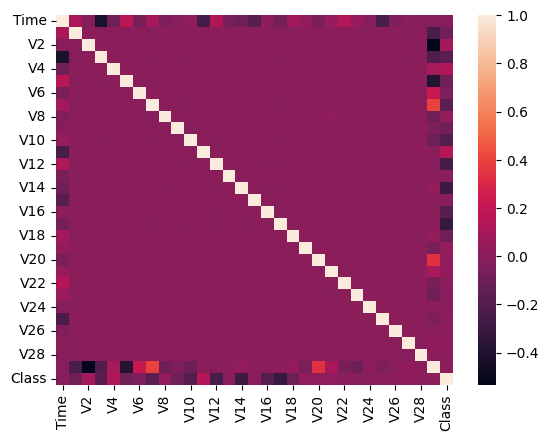

In [ ]:
# TEST: Model with dropped columns
corr = new_cc_df.corr()
sns.heatmap(corr)

In [ ]:
print(corr['Class'])

Time     -0.012359
V1       -0.094486
V2        0.084624
V3       -0.182322
V4        0.129326
V5       -0.087812
V6       -0.043915
V7       -0.172347
V8        0.033068
V9       -0.094021
V10      -0.206971
V11       0.149067
V12      -0.250711
V13      -0.003897
V14      -0.293375
V15      -0.003300
V16      -0.187186
V17      -0.313498
V18      -0.105340
V19       0.033631
V20       0.021486
V21       0.026357
V22       0.004887
V23      -0.006333
V24      -0.007210
V25       0.003202
V26       0.004265
V27       0.021892
V28       0.009682
Amount    0.005777
Class     1.000000
Name: Class, dtype: float64


In [ ]:
most_corr = new_cc_df[['V3','V7', 'V10', 'V12', 'V14', 'V16','V17', 'Class']]
most_corr.head()

,V3,V7,V10,V12,V14,V16,V17,Class
0,2.536347,0.239599,0.090794,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,-0.078803,-0.166974,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.791461,0.207643,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,0.237609,-0.054952,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.592941,0.753074,0.538196,-1.119670,-0.451449,-0.237033,0


In [ ]:
# Separate the data into labels and features
# Separate the y variable, the labels
y_new = most_corr['Class']

# Separate the X variable, the features
X_new = most_corr.drop(columns=['Class'])

In [ ]:
# Review the y variable Series
y_new.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
# Review the X variable DataFrame
X_new.head()

,V3,V7,V10,V12,V14,V16,V17
0,2.536347,0.239599,0.090794,-0.617801,-0.311169,-0.470401,0.207971
1,0.166480,-0.078803,-0.166974,1.065235,-0.143772,0.463917,-0.114805
2,1.773209,0.791461,0.207643,0.066084,-0.165946,-2.890083,1.109969
3,1.792993,0.237609,-0.054952,0.178228,-0.287924,-1.059647,-0.684093
4,1.548718,0.592941,0.753074,0.538196,-1.119670,-0.451449,-0.237033


In [ ]:
# Check the balance of our target values
y_new.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [ ]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_newtrain, X_newtest, y_newtrain, y_newtest = train_test_split(X_new, y_new, random_state=1)

In [ ]:
# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model

# Fit the original training data to the random_oversampler model
X_newres, y_newres = ro_model.fit_resample(X_newtrain, y_newtrain)

In [ ]:
# Count the distinct values of the resampled labels data, show updated balance
y_newres.value_counts()

0    212431
1    212431
Name: Class, dtype: int64

In [ ]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
res_new_classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using the resampled training data
res_new_classifier.fit(X_newres, y_newres)

# Make a prediction using the testing data
res_new_predictions = res_new_classifier.predict(X_newres)

In [ ]:
# Make a prediction using the testing data
testing_predictions = res_new_classifier.predict(X_newtest)

In [ ]:
# Print the balanced_accuracy score of the model
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_newtest, testing_predictions)}')

Balanced Accuracy Score: 0.9033005922658855


In [ ]:
# Generate a confusion matrix for the model
test_matrix = confusion_matrix(y_newtest, testing_predictions)
print(test_matrix)

[[69358  1464]
 [   19    91]]


In [ ]:
# Print the classification report for the model
testing_report = classification_report(y_newtest, testing_predictions)
print(testing_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     70822
           1       0.06      0.83      0.11       110

    accuracy                           0.98     70932
   macro avg       0.53      0.90      0.55     70932
weighted avg       1.00      0.98      0.99     70932



In [ ]:
os.path.exists("/content/drive/My Drive/Trained Models")

True

In [ ]:
jlib.dump(res_new_classifier, '/content/drive/My Drive/Trained Models/mynewmodelv2.pkl')

['/content/drive/My Drive/Trained Models/mynewmodelv2.pkl']